In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [46]:
teams_df = pd.read_csv('data/2025/womens_champ_teams.csv')
teams_df

,Club ID,Club
0,175321,BURLINGTON SC WOMEN
1,175332,HAMILTON UNITED WOMEN
2,183405,OAKVILLE SC WOMEN
3,175415,PICKERING FC WOMEN
4,175736,RUSH CANADA ACADEMY WOMEN
5,175350,SCROSOPPI FC WOMEN
6,175404,TECUMSEH UNITED FC WOMEN
7,175409,UNIONVILLE MILLIKEN SC WOMEN
8,183409,WHITBY FC WOMEN


In [47]:
scores_df = pd.read_csv('data/2025/2025-06-28_womens_champ_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,261913425,3,0,175350,175736
1,261913426,0,0,175404,175415
2,261913427,3,0,183409,175332
3,261913428,2,1,175409,183405
4,261913429,5,1,175415,175736
5,261913430,0,2,175332,175404
6,261913431,0,2,175409,175321
7,261913432,2,0,183405,175350
8,261913433,1,2,175736,175404
9,261913434,1,1,175415,175409


In [48]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [49]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           BURLINGTON SC WOMEN  HAMILTON UNITED WOMEN  OAKVILLE SC WOMEN  PICKERING FC WOMEN  RUSH CANADA ACADEMY WOMEN  SCROSOPPI FC WOMEN  TECUMSEH UNITED FC WOMEN  UNIONVILLE MILLIKEN SC WOMEN  WHITBY FC WOMEN
261913425                    0                      0                  0                   0                         -1                   1                         0                             0                0
261913426                    0                      0                  0                  -1                          0                   0                         1                             0                0
261913427                    0                     -1                  0                   0                          0                   0                         0                             0                1
261913428                    0                      0                 -1                   0                          0                   0         

In [50]:
print(X_df.T.to_string())

                              261913425  261913426  261913427  261913428  261913429  261913430  261913431  261913432  261913433  261913434  261913435  261913436  261913437  261913438  261913439  261913440  261913441  261913442  261913443  261913444  261913445  261913446  261913447  261913448  261913449  261913450  261913451  261913452  261913453  261913454  261913455  261913456  261913457  261913458  261913459  261913460  261913461  261913462  261913463  261913465  261913466  261913467  261913468  261913470
BURLINGTON SC WOMEN                   0          0          0          0          0          0          1          0          0          0          0         -1          0          0          1          0          0         -1          0          0          0          0          0         -1          0          0         -1          0          0          0          0         -1          0         -1          0          0          0         -1          0          0         -1        

In [51]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                              BURLINGTON SC WOMEN  HAMILTON UNITED WOMEN  OAKVILLE SC WOMEN  PICKERING FC WOMEN  RUSH CANADA ACADEMY WOMEN  SCROSOPPI FC WOMEN  TECUMSEH UNITED FC WOMEN  UNIONVILLE MILLIKEN SC WOMEN  WHITBY FC WOMEN
BURLINGTON SC WOMEN                            10                     -2                 -1                  -1                         -1                  -1                        -1                            -2               -1
HAMILTON UNITED WOMEN                          -2                     10                 -1                  -1                         -1                  -1                        -2                            -1               -1
OAKVILLE SC WOMEN                              -1                     -1                  9                  -1                         -1                  -2                         0                            -1               -2
PICKERING FC WOMEN                             -1                     -1

In [52]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                              BURLINGTON SC WOMEN  HAMILTON UNITED WOMEN  OAKVILLE SC WOMEN  PICKERING FC WOMEN  RUSH CANADA ACADEMY WOMEN  SCROSOPPI FC WOMEN  TECUMSEH UNITED FC WOMEN  UNIONVILLE MILLIKEN SC WOMEN  WHITBY FC WOMEN
BURLINGTON SC WOMEN                            10                     -2                 -1                  -1                         -1                  -1                        -1                            -2               -1
HAMILTON UNITED WOMEN                          -2                     10                 -1                  -1                         -1                  -1                        -2                            -1               -1
OAKVILLE SC WOMEN                              -1                     -1                  9                  -1                         -1                  -2                         0                            -1               -2
PICKERING FC WOMEN                             -1                     -1

In [53]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = pd.DataFrame(p, index=teams, columns=['GD'])
print(p_bar.to_string())

                              GD
BURLINGTON SC WOMEN          -19
HAMILTON UNITED WOMEN          3
OAKVILLE SC WOMEN              1
PICKERING FC WOMEN            10
RUSH CANADA ACADEMY WOMEN    -10
SCROSOPPI FC WOMEN             8
TECUMSEH UNITED FC WOMEN       2
UNIONVILLE MILLIKEN SC WOMEN  -3
WHITBY FC WOMEN                8


In [54]:
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                              GD
BURLINGTON SC WOMEN          -19
HAMILTON UNITED WOMEN          3
OAKVILLE SC WOMEN              1
PICKERING FC WOMEN            10
RUSH CANADA ACADEMY WOMEN    -10
SCROSOPPI FC WOMEN             8
TECUMSEH UNITED FC WOMEN       2
UNIONVILLE MILLIKEN SC WOMEN  -3
WHITBY FC WOMEN                0


In [55]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                              GD with limited blowouts
BURLINGTON SC WOMEN                                -14
HAMILTON UNITED WOMEN                                1
OAKVILLE SC WOMEN                                    1
PICKERING FC WOMEN                                   6
RUSH CANADA ACADEMY WOMEN                           -6
SCROSOPPI FC WOMEN                                   7
TECUMSEH UNITED FC WOMEN                             2
UNIONVILLE MILLIKEN SC WOMEN                        -5
WHITBY FC WOMEN                                      0


In [56]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                              massey_rating
WHITBY FC WOMEN                    0.823907
PICKERING FC WOMEN                 0.813061
SCROSOPPI FC WOMEN                 0.685501
OAKVILLE SC WOMEN                  0.239071
HAMILTON UNITED WOMEN              0.124566
TECUMSEH UNITED FC WOMEN           0.118693
UNIONVILLE MILLIKEN SC WOMEN      -0.357765
RUSH CANADA ACADEMY WOMEN         -0.698562
BURLINGTON SC WOMEN               -1.748473


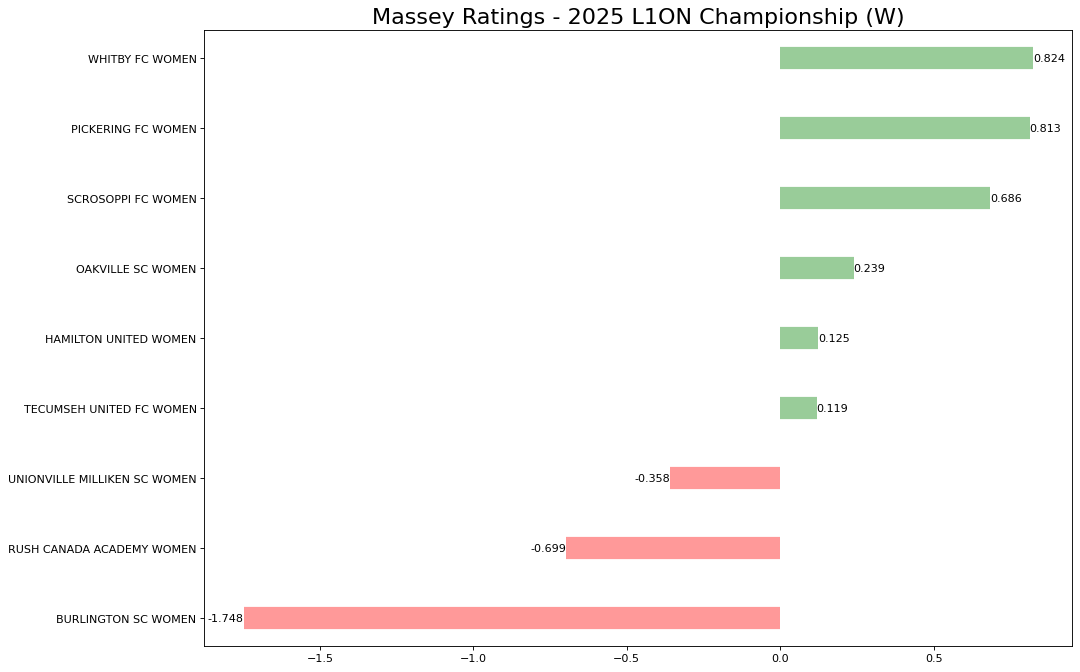

In [57]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Championship (W)', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [58]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                              massey_rating
WHITBY FC WOMEN                    0.823089
SCROSOPPI FC WOMEN                 0.621120
PICKERING FC WOMEN                 0.460776
OAKVILLE SC WOMEN                  0.230886
TECUMSEH UNITED FC WOMEN           0.135352
HAMILTON UNITED WOMEN             -0.017034
RUSH CANADA ACADEMY WOMEN         -0.398563
UNIONVILLE MILLIKEN SC WOMEN      -0.532904
BURLINGTON SC WOMEN               -1.322722


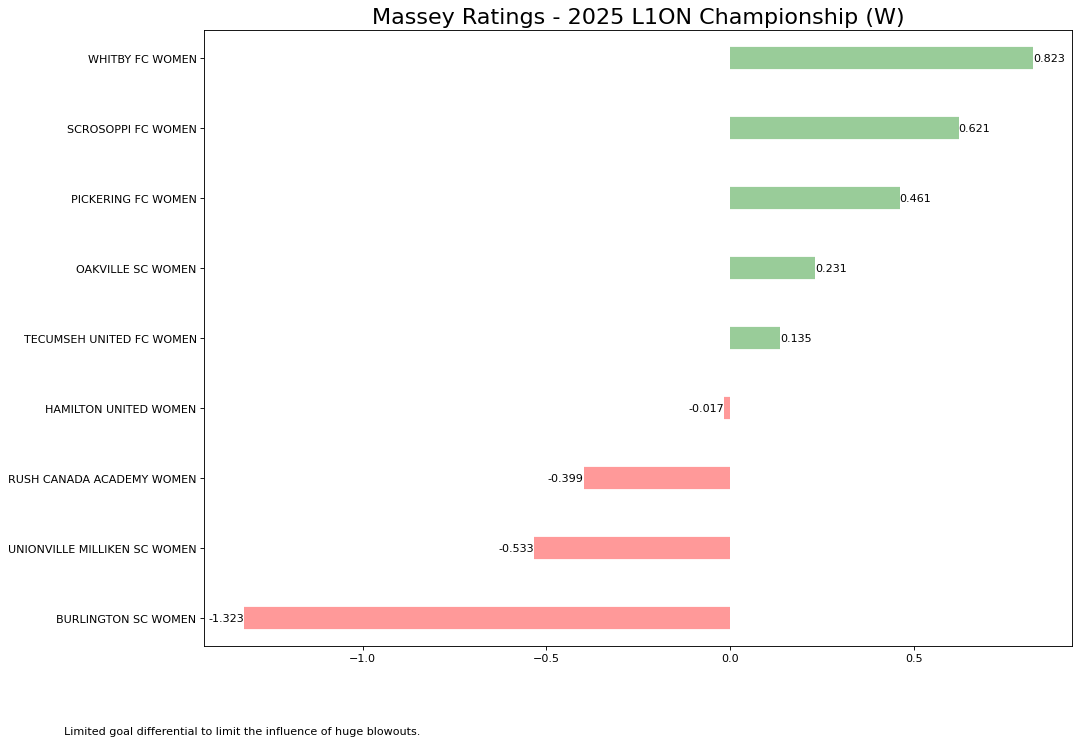

In [59]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Championship (W)', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()